**Acerca del conjunto de datos**

El conjunto de datos de jugadores de la Bundesliga ofrece una recopilación completa de información sobre todos los jugadores de la liga de fútbol de la Bundesliga alemana.

Desde porteros de renombre hasta defensores talentosos, este conjunto de datos ofrece una amplia gama de detalles de los jugadores, incluidos sus **nombres**, **nombres completos**, **edades**, **alturas**, **nacionalidades**, **lugares de nacimiento**, **precios**, **precios máximos**, **posiciones**, **números de camiseta**, **pie preferido**, **clubes actuales**, **fechas de vencimiento de contratos**, **fechas de incorporación a los clubes**, **agentes de jugadores** y **proveedores de equipamiento**.

 Ya sea un apasionado del fútbol, ​​un analista deportivo o un entusiasta del fútbol fantasy, este conjunto de datos sirve como un recurso valioso para explorar y analizar los perfiles de los jugadores de la Bundesliga, lo que le permite profundizar en sus antecedentes, estadísticas de rendimiento y afiliaciones a clubes. Descubra a las estrellas del fútbol alemán y obtenga información sobre sus carreras con este completo conjunto de datos de jugadores de la Bundesliga.

#1. Exploracion de la data

In [819]:
#Importamos librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [820]:
#Cargamos data a una variable
data = pd.read_csv("/content/bundesliga_player[1].csv")

In [821]:
# 5 primeras filas de la data
data.head()

,Unnamed: 0,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [822]:
# Filas y columnas
data.shape

(515, 17)

In [823]:
# Columnas de nuestra data
data.columns

Index(['Unnamed: 0', 'name', 'full_name', 'age', 'height', 'nationality',
       'place_of_birth', 'price', 'max_price', 'position', 'shirt_nr', 'foot',
       'club', 'contract_expires', 'joined_club', 'player_agent', 'outfitter'],
      dtype='object')

In [824]:
#Tipo de datos de nuestras columnas
data.dtypes

,0
Unnamed: 0,int64
name,object
full_name,object
age,int64
height,float64
nationality,object
place_of_birth,object
price,float64
max_price,float64
position,object


In [825]:
#Eiliminando columna "Unnamed: 0". Representa los indices que tiene cada fila
data = data.drop(columns = "Unnamed: 0")

In [826]:
# Mostramos cambios realizados
data.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [827]:
# Reenombrando nombres de las columnas

data = data.rename(columns = {"name":"nombre",
                              "full_name":"nombre_completo",
                              "age": "edad",
                              "height":"altura(m)",
                              "nationality":"nacionalidad",
                              "place_of_birth":"lugar_de_nacimiento",
                              "price":"precio_actual(Mill.€)",
                              "max_price":"maximo_precio(Mill.€)",
                              "position":"posicion",
                              "shirt_nr":"numero_camiseta",
                              "foot":"pierna_dominante",
                              "contract_expires":"expiracion_de_contrato",
                              "joined_club":"ingreso_al_club",
                              "player_agent":"agente_del_jugador",
                              "outfitter":"Patrocinador"})

In [828]:
# Nuevas columnas de la data
data.columns

Index(['nombre', 'nombre_completo', 'edad', 'altura(m)', 'nacionalidad',
       'lugar_de_nacimiento', 'precio_actual(Mill.€)', 'maximo_precio(Mill.€)',
       'posicion', 'numero_camiseta', 'pierna_dominante', 'club',
       'expiracion_de_contrato', 'ingreso_al_club', 'agente_del_jugador',
       'Patrocinador'],
      dtype='object')

#2. Preprocesamiento de datos

In [829]:
# 5 primeras filas de la data
data.head()

,nombre,nombre_completo,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


In [830]:
# Datos nulos que se encuentran en nuestra data
data.isna().sum()

,0
nombre,0
nombre_completo,286
edad,0
altura(m),0
nacionalidad,0
lugar_de_nacimiento,5
precio_actual(Mill.€),5
maximo_precio(Mill.€),5
posicion,0
numero_camiseta,0


In [831]:
# Vemos que tenemos varias columnas que contienen datos faltantes o nulos.
# La mayoria de los datos se encuentran en la columna "nombre_completo". Como esta columna no nos proporciona informacion relevante lo que hacemos es eliminarla de nuestra data
data = data.drop(columns = "nombre_completo")

In [832]:
pd.set_option("display.max_rows",None)

In [833]:
data["lugar_de_nacimiento"].value_counts()

,count
lugar_de_nacimiento,
Berlin,20
Stuttgart,13
München,12
Hamburg,9
Zagreb,7
Amsterdam,6
Köln,6
Frankfurt am Main,5
Bremen,5


In [834]:
# Aplicando filtro para ver las filas que contienen datos nulos o faltantes en la columna "lugar_de_nacimiento"
data[data["lugar_de_nacimiento"].isna()]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
65,Oskar Preil,19,1.87,Germany,NaN,NaN,NaN,Goalkeeper,29,right,RB Leipzig,2023-06-30,2022-07-01,SOCCERNATION GROUP,NaN
126,Aurélio Buta,26,1.72,Portugal Angola,NaN,6.0,6.0,Defender - Right-Back,24,right,E. Frankfurt,2026-06-30,2022-07-01,Proeleven S.A.,NaN
173,Philipp Schulze,20,1.90,Germany,NaN,0.2,0.2,Goalkeeper,35,NaN,VfL Wolfsburg,2026-06-30,2021-07-01,PRO Profil GmbH,adidas
299,Arne Engels,19,1.85,Belgium,NaN,3.5,3.5,midfield - Central Midfield,27,right,FC Augsburg,2027-06-30,2023-01-03,Wasserman,NaN
348,Philipp Schulz,17,1.88,Germany,NaN,0.3,0.3,Defender - Centre-Back,45,right,1.FSV Mainz 05,2025-06-30,2022-07-01,Agent is known - Player under 18,NaN


## 2.1 Reemplazando valores faltantes

Estos datos faltantes se reemplazaron consultando la pagina Transfermarkt que es un sitio web que ofrece información sobre fútbol, como estadísticas, resultados, noticias, fichajes, y valores de mercado más actualizados.

### Columna: **lugar_de_nacimiento**

In [835]:
# Como no sabemos exactamente en que lugar nacieron, vamos a buscar sus origenes en internet.
# Podriamos reemplazar esos valores con la moda, pero para ser exactos vamos a buscarlos

# index 65
data.loc[65,"lugar_de_nacimiento"] = "No registra"

#index 126
data.loc[126,"lugar_de_nacimiento"] = "Miconge"

#index 173
data.loc[173,"lugar_de_nacimiento"] = "Neustadt an der Weinstraße"

#index 299
data.loc[299,"lugar_de_nacimiento"] = "Dendermonde"

#index 348
data.loc[348,"lugar_de_nacimiento"] = "No registra"

In [836]:
data.isna().sum()

,0
nombre,0
edad,0
altura(m),0
nacionalidad,0
lugar_de_nacimiento,0
precio_actual(Mill.€),5
maximo_precio(Mill.€),5
posicion,0
numero_camiseta,0
pierna_dominante,9


### columna: **precio_actual(Mill.€)**

In [837]:
data[data["precio_actual(Mill.€)"].isna()]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
65,Oskar Preil,19,1.87,Germany,No registra,NaN,NaN,Goalkeeper,29,right,RB Leipzig,2023-06-30,2022-07-01,SOCCERNATION GROUP,NaN
143,Nacho Ferri,18,1.92,Spain,Montaverner,NaN,NaN,Attack - Centre-Forward,48,right,E. Frankfurt,2025-06-30,2022-10-05,INVSPORT (Sergio ...,NaN
156,Simon Walde,18,1.85,Germany,Düsseldorf,NaN,NaN,Defender - Right-Back,45,right,Bor. M'gladbach,2026-06-30,2023-01-04,Wasserman,adidas
301,Mert Kömür,17,1.83,Germany Turkey,Dachau,NaN,NaN,midfield - Attacking Midfield,20,both,FC Augsburg U19,2027-06-30,2022-07-01,Agent is known - Player under 18,adidas
377,Elias Bakatukanda,19,1.93,Germany DR Congo,Köln,NaN,NaN,Defender - Centre-Back,5,both,1.FC Köln U19,2026-06-30,2021-07-01,FM Worldsport,NaN


In [838]:
# Reemplazando valores faltantes o nulos

# indix 65
data.loc[65,"precio_actual(Mill.€)"] = 0.1

# index 143
data.loc[143,"precio_actual(Mill.€)"] = 2.2

# index 156
data.loc[156,"precio_actual(Mill.€)"] = 0.4

# index 301
data.loc[301,"precio_actual(Mill.€)"] = 2.0

# index 377
data.loc[377,"precio_actual(Mill.€)"] = 0.25

In [839]:
data.columns

Index(['nombre', 'edad', 'altura(m)', 'nacionalidad', 'lugar_de_nacimiento',
       'precio_actual(Mill.€)', 'maximo_precio(Mill.€)', 'posicion',
       'numero_camiseta', 'pierna_dominante', 'club', 'expiracion_de_contrato',
       'ingreso_al_club', 'agente_del_jugador', 'Patrocinador'],
      dtype='object')

In [840]:
data.isna().sum()

,0
nombre,0
edad,0
altura(m),0
nacionalidad,0
lugar_de_nacimiento,0
precio_actual(Mill.€),0
maximo_precio(Mill.€),5
posicion,0
numero_camiseta,0
pierna_dominante,9


### columna: **maximo_precio(Mill.€)**

In [841]:
# Mostramos las filas que contienen datos faltantes o nulos en la columna maximo_precio(Mill.€)
data[data["maximo_precio(Mill.€)"].isna()]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
65,Oskar Preil,19,1.87,Germany,No registra,0.10,NaN,Goalkeeper,29,right,RB Leipzig,2023-06-30,2022-07-01,SOCCERNATION GROUP,NaN
143,Nacho Ferri,18,1.92,Spain,Montaverner,2.20,NaN,Attack - Centre-Forward,48,right,E. Frankfurt,2025-06-30,2022-10-05,INVSPORT (Sergio ...,NaN
156,Simon Walde,18,1.85,Germany,Düsseldorf,0.40,NaN,Defender - Right-Back,45,right,Bor. M'gladbach,2026-06-30,2023-01-04,Wasserman,adidas
301,Mert Kömür,17,1.83,Germany Turkey,Dachau,2.00,NaN,midfield - Attacking Midfield,20,both,FC Augsburg U19,2027-06-30,2022-07-01,Agent is known - Player under 18,adidas
377,Elias Bakatukanda,19,1.93,Germany DR Congo,Köln,0.25,NaN,Defender - Centre-Back,5,both,1.FC Köln U19,2026-06-30,2021-07-01,FM Worldsport,NaN


In [842]:
# Elimina los espacios que se encuentran en la columna "posicion"
data["posicion"] = data["posicion"].str.strip()

In [843]:
# Muestra los valores unicos de la columna "posicion"
data["posicion"].unique()

array(['Goalkeeper', 'Defender - Centre-Back', 'Defender - Left-Back',
       'Defender - Right-Back', 'midfield - Defensive Midfield',
       'midfield - Central Midfield', 'midfield - Attacking Midfield',
       'Attack - Left Winger', 'Attack - Right Winger',
       'Attack - Second Striker', 'Attack - Centre-Forward',
       'midfield - Right Midfield', 'midfield - Left Midfield'],
      dtype=object)

In [844]:
# Reemplazando valores faltantes de la columna "maximo_precio(Mill.€)"

# Index: 65
data.loc[65,"maximo_precio(Mill.€)"] = 0.1

# Index: 143
data.loc[143,"maximo_precio(Mill.€)"] = 2.2

# Index: 143
data.loc[156,"maximo_precio(Mill.€)"] = 0.4

# Index: 301
data.loc[301,"maximo_precio(Mill.€)"] = 2.0

# Index: 377
data.loc[377,"maximo_precio(Mill.€)"] = 0.25

In [845]:
data.isna().sum()

,0
nombre,0
edad,0
altura(m),0
nacionalidad,0
lugar_de_nacimiento,0
precio_actual(Mill.€),0
maximo_precio(Mill.€),0
posicion,0
numero_camiseta,0
pierna_dominante,9


### Columna : **pierna_dominante**

In [846]:
data[data["pierna_dominante"].isna()]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
3,Johannes Schenk,20,1.91,Germany,Schweinfurt,0.30,0.30,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
101,Ayman Azhil,22,1.75,Morocco Germany,Düsseldorf,0.40,0.40,midfield - Defensive Midfield,32,NaN,B. Leverkusen,2023-06-30,2020-07-01,KL Sportsbase,NaN
132,Mehdi Loune,18,1.72,Germany Morocco,Hanau,0.30,0.30,midfield - Central Midfield,45,NaN,E. Frankfurt,2025-06-30,2022-07-01,Selected ...,Puma
173,Philipp Schulze,20,1.90,Germany,Neustadt an der Weinstraße,0.20,0.20,Goalkeeper,35,NaN,VfL Wolfsburg,2026-06-30,2021-07-01,PRO Profil GmbH,adidas
190,Patrick Wimmer,21,1.82,Austria,Tulln,12.00,12.00,Attack - Right Winger,39,NaN,VfL Wolfsburg,2027-06-30,2022-07-01,More than Sport GmbH,Puma
224,Luca Philipp,22,1.92,Germany,Stuttgart,0.30,0.30,Goalkeeper,37,NaN,TSG Hoffenheim,2024-06-30,2020-07-31,Relatives,NaN
339,Thomas Kastanaras,20,1.86,Germany Greece,Stuttgart,0.70,0.70,Attack - Centre-Forward,39,NaN,VfB Stuttgart,2025-06-30,2022-07-01,Unique Sports Group,Puma
376,Rijad Smajic,19,1.90,Bosnia-Herzegovina Germany,Köln,0.20,0.20,Defender - Centre-Back,19,NaN,1.FC Köln II,2025-06-30,2022-01-01,OLP Sports,NaN
434,Louis Lord,19,1.90,Germany,Vechta,0.15,0.15,Goalkeeper,1,NaN,W. Bremen II,NaN,2021-07-01,CAA Stellar,NaN


In [847]:
data["pierna_dominante"].unique()

array(['right', nan, 'left', 'both'], dtype=object)

In [848]:
# Creamos funcion que reemplaze el valore nulo o faltante con el correspondiente
def cambio_dato(data,indice,valor):
  data.loc[indice,"pierna_dominante"] = valor

In [849]:
# Reemplazando valores faltantes o nulos de la columna "pierna_dominante"

cambio_dato(data,3,"right")
cambio_dato(data,101,"right")
cambio_dato(data,132,"right")
cambio_dato(data,173,"right")
cambio_dato(data,190,"right")
cambio_dato(data,224,"right")
cambio_dato(data,339,"left")
cambio_dato(data,376,"right")
cambio_dato(data,434,"right")

In [850]:
data.isna().sum()

,0
nombre,0
edad,0
altura(m),0
nacionalidad,0
lugar_de_nacimiento,0
precio_actual(Mill.€),0
maximo_precio(Mill.€),0
posicion,0
numero_camiseta,0
pierna_dominante,0


### Columna: **club**

In [851]:
data["club"].unique()

array(['Bayern Munich', 'Bor. Dortmund', 'B. Dortmund II', 'RB Leipzig',
       'RB Leipzig U19', 'RB Leipzig U17', 'B. Leverkusen',
       'E. Frankfurt', "Bor. M'gladbach", 'VfL Wolfsburg', 'SC Freiburg',
       'TSG Hoffenheim', 'Union Berlin', 'FC Augsburg', 'FC Augsburg U19',
       'VfB Stuttgart', '1.FSV Mainz 05', '1.FC Köln', '1.FC Köln II',
       '1.FC Köln U19', 'Hertha BSC', 'Hertha BSC II', 'Hertha BSC U19',
       'Werder Bremen', 'W. Bremen U19', 'W. Bremen II', 'FC Schalke 04',
       'VfL Bochum'], dtype=object)

In [852]:
# Contar cuántas veces aparece cada club para saber cuantos jugadores hay en cada equipo
conteo_clubes = data.groupby("club").size()
conteo_clubes

,0
club,
1.FC Köln,27
1.FC Köln II,5
1.FC Köln U19,1
1.FSV Mainz 05,27
B. Dortmund II,3
B. Leverkusen,27
Bayern Munich,27
Bor. Dortmund,30
Bor. M'gladbach,27


Notamos:
* Existen clubes que solo tienen de 1 a 5 jugadores.
* Los clubes que contienen poco jugadores pertenecen a la segunda division y inferiores de la Bundesliga.


Equipos         |
-------         |
1.FC Köln II    |
1.FC Köln U19   |
B. Dortmund II  |
FC Augsburg U19 |
Hertha BSC II   |
Hertha BSC U19  |
RB Leipzig U17  |
RB Leipzig U19  |
W. Bremen II    |
W. Bremen U19	  |



Estos clubes seleccionado se eliminaran porque:
* Estamos analizando unicamente el rendimiento de la liga principal **Bundesliga**.
* Estos equipos menores pueden generar ruido en el analisis como distorsionar estadisticas como la edad, el valor del mercado etc.
* Generarian graficos engañosos

In [853]:
data.loc[data["club"] == "W. Bremen U19"]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
432,Mio Backhaus,19,1.94,Germany,Mönchengladbach,0.3,0.3,Goalkeeper,1,right,W. Bremen U19,NaN,2021-07-01,feel soccer GmbH,NaN


In [854]:
data.loc[data["club"] == "W. Bremen II"]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
434,Louis Lord,19,1.9,Germany,Vechta,0.15,0.15,Goalkeeper,1,right,W. Bremen II,NaN,2021-07-01,CAA Stellar,NaN


In [855]:
data.loc[data["club"] == "1.FC Köln II"]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
370,Julian Roloff,22,1.92,Germany,Grevenbroich,0.1,0.1,Goalkeeper,1,right,1.FC Köln II,2024-06-30,2023-01-15,DC International ...,Stanno
376,Rijad Smajic,19,1.90,Bosnia-Herzegovina Germany,Köln,0.2,0.2,Defender - Centre-Back,19,right,1.FC Köln II,2025-06-30,2022-01-01,OLP Sports,NaN
384,Georg Strauch,22,1.77,Germany,Bonn,0.2,0.2,midfield - Defensive Midfield,17,right,1.FC Köln II,2024-06-30,2020-07-01,Teamgeist ...,NaN
387,Joshua Schwirten,21,1.82,Germany,Bergisch Gladbach,0.2,0.2,midfield - Central Midfield,10,both,1.FC Köln II,2023-06-30,2021-07-01,CS,NaN
400,Maximilian Schmid,20,1.84,Germany,Hanau,0.2,0.2,Attack - Centre-Forward,9,right,1.FC Köln II,2024-06-30,2022-07-01,ROGON U23,Nike


In [856]:
data.loc[data["club"] == "1.FC Köln U19"]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
377,Elias Bakatukanda,19,1.93,Germany DR Congo,Köln,0.25,0.25,Defender - Centre-Back,5,both,1.FC Köln U19,2026-06-30,2021-07-01,FM Worldsport,NaN


In [857]:
data.loc[data["club"] == "B. Dortmund II"]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
35,Antonios Papadopoulos,23,1.86,Germany Greece,Stuttgart,0.6,0.6,Defender - Centre-Back,18,right,B. Dortmund II,2024-06-30,2021-07-01,CAA Stellar,NaN
46,Abdoulaye Kamara,18,1.83,France Guinea,Conakry,1.0,1.0,midfield - Defensive Midfield,32,right,B. Dortmund II,2024-06-30,2021-07-20,NaN,NaN
52,Göktan Gürpüz,20,1.76,Turkey Germany,Duisburg,0.3,0.3,midfield - Attacking Midfield,42,right,B. Dortmund II,2025-06-30,2022-07-01,SBE Management AG,NaN


In [858]:
data.loc[data["club"] == "FC Augsburg U19"]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
301,Mert Kömür,17,1.83,Germany Turkey,Dachau,2.0,2.0,midfield - Attacking Midfield,20,both,FC Augsburg U19,2027-06-30,2022-07-01,Agent is known - Player under 18,adidas


In [859]:
data.loc[data["club"] == "Hertha BSC II"]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
410,Lukas Ullrich,19,1.8,Germany,Berlin,0.75,0.75,Defender - Left-Back,26,left,Hertha BSC II,2023-06-30,2022-07-01,SEG,Puma


In [860]:
data.loc[data["club"] == "Hertha BSC U19"]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
429,Ibrahim Maza,17,1.77,Germany Algeria,Berlin,0.25,0.25,Attack - Centre-Forward,10,right,Hertha BSC U19,2026-06-30,2022-07-01,Agent is known - Player under 18,NaN


In [861]:
data.loc[data["club"] == "RB Leipzig U17"]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
64,Timo Schlieck,17,1.95,Germany,Oelde,0.2,0.2,Goalkeeper,1,right,RB Leipzig U17,2025-06-30,2021-07-01,NaN,NaN


In [862]:
data.loc[data["club"] == "RB Leipzig U19"]

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
63,Jonas Nickisch,18,1.9,Germany,Dresden,0.2,0.2,Goalkeeper,1,both,RB Leipzig U19,2023-06-30,2021-07-01,neblung ...,NaN


In [863]:
data = data.drop([432,434,370,376,384,387,400,377,35,46,52,301,410,429,64,63],axis = 0)

In [864]:
conteo_clubes = data.groupby("club").size()
conteo_clubes

,0
club,
1.FC Köln,27
1.FSV Mainz 05,27
B. Leverkusen,27
Bayern Munich,27
Bor. Dortmund,30
Bor. M'gladbach,27
E. Frankfurt,30
FC Augsburg,31
FC Schalke 04,31


### Reemplazando valores faltantes o NaN con la moda

In [865]:
#Mostrando datos nulos o NaN de la data
data.isna().sum()

,0
nombre,0
edad,0
altura(m),0
nacionalidad,0
lugar_de_nacimiento,0
precio_actual(Mill.€),0
maximo_precio(Mill.€),0
posicion,0
numero_camiseta,0
pierna_dominante,0


In [866]:
# Mostrando el tipo de datos de las columnas
data.dtypes

,0
nombre,object
edad,int64
altura(m),float64
nacionalidad,object
lugar_de_nacimiento,object
precio_actual(Mill.€),float64
maximo_precio(Mill.€),float64
posicion,object
numero_camiseta,int64
pierna_dominante,object


Notamos que a las columnas que le faltan datos faltantes todas tienen el tipo de dato object. Al ser un tipo de datos categorico se reemplazaran estos valores con la medida de tendencia central **moda**.

In [867]:
# Creamos funcion que permita modificar los datos NaN

def imputacion_categorica (data,columna):
  data[columna] = data[columna].fillna(data[columna].mode()[0])

  return data[columna]

In [868]:
#Se asignan las columnas a la funcion de imputacion categorica correspondiente

data["expiracion_de_contrato"] = imputacion_categorica(data,"expiracion_de_contrato")
data["agente_del_jugador"] = imputacion_categorica(data,"agente_del_jugador")
data["Patrocinador"] = imputacion_categorica(data,"Patrocinador")

In [869]:
#Mostrando valores faltantes o NaN
data.isna().sum()

,0
nombre,0
edad,0
altura(m),0
nacionalidad,0
lugar_de_nacimiento,0
precio_actual(Mill.€),0
maximo_precio(Mill.€),0
posicion,0
numero_camiseta,0
pierna_dominante,0


## 2.2 Cambiando el tipo de datos de las columnas

In [870]:
data.dtypes

,0
nombre,object
edad,int64
altura(m),float64
nacionalidad,object
lugar_de_nacimiento,object
precio_actual(Mill.€),float64
maximo_precio(Mill.€),float64
posicion,object
numero_camiseta,int64
pierna_dominante,object


In [871]:
# Cambioando de tipo de datos object (str) a datetime
data["expiracion_de_contrato"] = pd.to_datetime(data["expiracion_de_contrato"])
data["ingreso_al_club"] = pd.to_datetime(data["ingreso_al_club"])

In [872]:
data.dtypes

,0
nombre,object
edad,int64
altura(m),float64
nacionalidad,object
lugar_de_nacimiento,object
precio_actual(Mill.€),float64
maximo_precio(Mill.€),float64
posicion,object
numero_camiseta,int64
pierna_dominante,object


## 2.3 Valores unicos de las columnas categoricas

#### Columna: **nacionalidad**

Notamos que algunas filas contienen múltiples nacionalidades separadas por caracteres invisibles (\xa0\xa0, que representan espacios no rompibles en HTML).

In [873]:
data["nacionalidad"].unique()

array(['Germany', 'Switzerland', 'Netherlands',
       'France\xa0\xa0Guinea-Bissau', 'France\xa0\xa0Spain',
       'Canada\xa0\xa0Liberia', 'Portugal', 'France',
       'Morocco\xa0\xa0Netherlands', 'Croatia\xa0\xa0Germany',
       'Senegal\xa0\xa0France', 'Netherlands\xa0\xa0Suriname',
       'Germany\xa0\xa0England', 'Germany\xa0\xa0Austria',
       'Germany\xa0\xa0Kosovo', 'France\xa0\xa0Guadeloupe', 'Senegal',
       'Germany\xa0\xa0France', "Germany\xa0\xa0Cote d'Ivoire",
       'Cameroon\xa0\xa0Germany', 'Germany\xa0\xa0Poland',
       'France\xa0\xa0Mali', 'Portugal\xa0\xa0France', 'Norway',
       'Belgium', 'Spain', 'Turkey\xa0\xa0Germany',
       'Germany\xa0\xa0Turkey', 'England', 'Germany\xa0\xa0Syria',
       'United States\xa0\xa0Portugal', 'Germany\xa0\xa0Nigeria',
       'England\xa0\xa0Barbados', "Cote d'Ivoire\xa0\xa0France",
       'Germany\xa0\xa0Cameroon', 'France\xa0\xa0Martinique', 'Hungary',
       'Croatia', 'France\xa0\xa0Guinea', 'Hungary\xa0\xa0Germany',
  

**Solucion:** Reemplazamos los espacion invicibles (\xa0) por un espacio normal.

In [874]:
data["nacionalidad"] = data["nacionalidad"].str.replace("\xa0", " ", regex=True)

In [875]:
data["nacionalidad"].unique()

array(['Germany', 'Switzerland', 'Netherlands', 'France  Guinea-Bissau',
       'France  Spain', 'Canada  Liberia', 'Portugal', 'France',
       'Morocco  Netherlands', 'Croatia  Germany', 'Senegal  France',
       'Netherlands  Suriname', 'Germany  England', 'Germany  Austria',
       'Germany  Kosovo', 'France  Guadeloupe', 'Senegal',
       'Germany  France', "Germany  Cote d'Ivoire", 'Cameroon  Germany',
       'Germany  Poland', 'France  Mali', 'Portugal  France', 'Norway',
       'Belgium', 'Spain', 'Turkey  Germany', 'Germany  Turkey',
       'England', 'Germany  Syria', 'United States  Portugal',
       'Germany  Nigeria', 'England  Barbados', "Cote d'Ivoire  France",
       'Germany  Cameroon', 'France  Martinique', 'Hungary', 'Croatia',
       'France  Guinea', 'Hungary  Germany', 'Germany  Senegal',
       'Germany  Ghana', 'Austria', 'Mali', 'Slovenia', 'Sweden',
       'United States', 'France  DR Congo', 'Denmark  Tanzania',
       'Finland  Slovakia', 'Russia', 'Burkina 

# 3. Distribución de los datos

Veremos como estan distribuidos los datos que se encuentran en nuestro DataFrame una vez tratados los datos faltantes.
* Utilizaremos graficas para ver la distribución.

In [876]:
data.head(5)

,nombre,edad,altura(m),nacionalidad,lugar_de_nacimiento,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,numero_camiseta,pierna_dominante,club,expiracion_de_contrato,ingreso_al_club,agente_del_jugador,Patrocinador
0,Manuel Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,right,Bayern Munich,2024-06-30,2022-07-01,11WINS,adidas
4,Matthijs de Ligt,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


## Correlación entre variables

In [877]:
data.columns

Index(['nombre', 'edad', 'altura(m)', 'nacionalidad', 'lugar_de_nacimiento',
       'precio_actual(Mill.€)', 'maximo_precio(Mill.€)', 'posicion',
       'numero_camiseta', 'pierna_dominante', 'club', 'expiracion_de_contrato',
       'ingreso_al_club', 'agente_del_jugador', 'Patrocinador'],
      dtype='object')

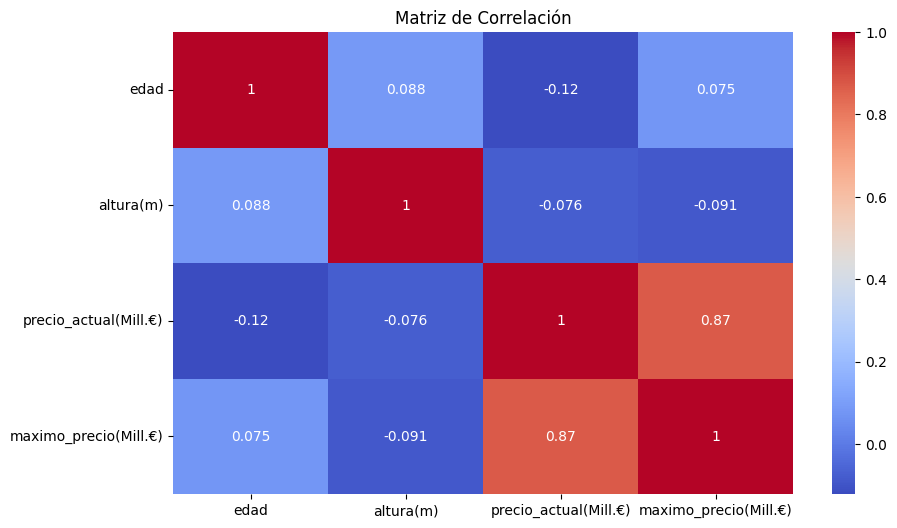

In [878]:
# Vemos la correlacion que hay entre variables (numericas)
plt.figure(figsize=(10,6))
sns.heatmap(data = data[["edad","altura(m)","precio_actual(Mill.€)","maximo_precio(Mill.€)"]].corr(),
            annot=True,
            cmap="coolwarm")
plt.title("Matriz de Correlación")
plt.show()


Notamos que existe una fuerte relacion entre las variables **maximo_precio** y **precio_actual**
* Esto significa que son buenas variables para hacer predicciones.

## Distribución de edades de los jugadores en la Bundesliga

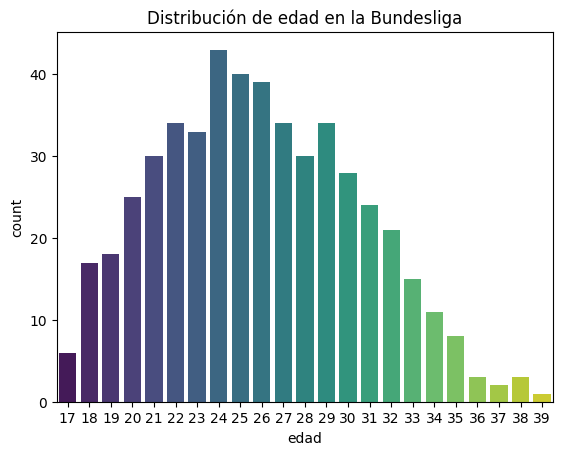

In [879]:
sns.countplot(x = data["edad"], palette = "viridis")
plt.title("Distribución de edad en la Bundesliga")
plt.show()

## Distribución de jugadores por posicion en la Bundesliga

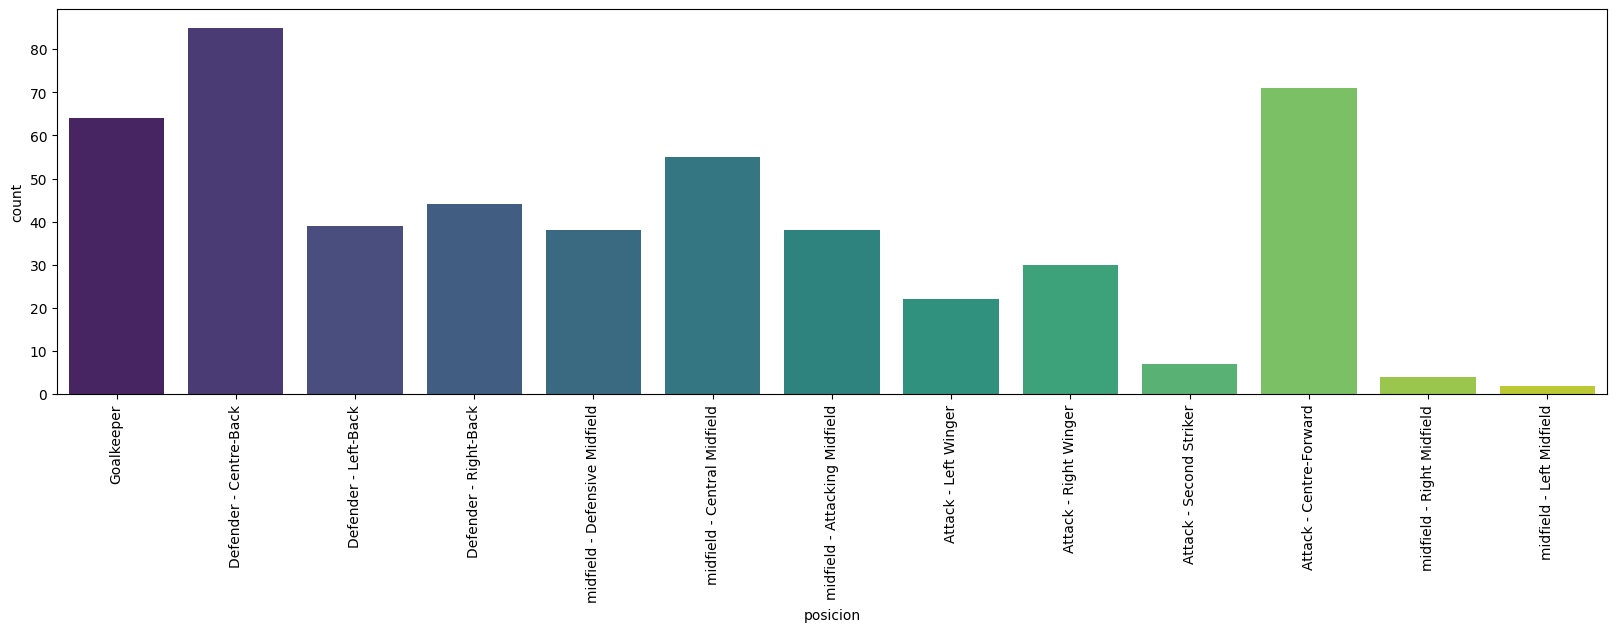

In [880]:
plt.figure(figsize = (20,5)) # Establecemos tamaño de la grafica
sns.countplot(x = data["posicion"], palette = "viridis") # Grafica de barras
plt.xticks(rotation = 90) # Rotar texto eje x 90°
plt.show() #Mostrar grafica

## Distribucion de jugadores por club en la Bundesliga

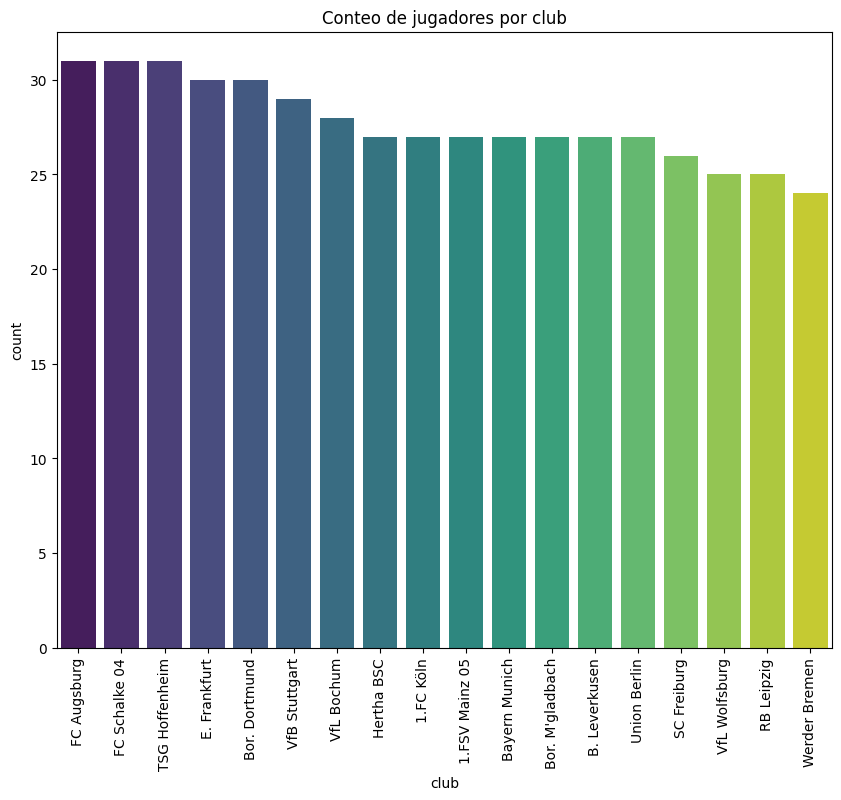

In [881]:
plt.figure(figsize = (10,8)) # Establecemos tamaño de la grafica

sns.countplot(x = data["club"], # Definimos eje x
              order = data["club"].value_counts().index, # Ordenamos la data de forma descendente
              palette = "viridis") # Utilizamos paleta de colores

plt.xticks(rotation =90) # Rotamos texto del eje x

plt.title("Conteo de jugadores por club")
plt.show()

## Distribucion de pie dominante

Text(0.5, 1.0, 'Distribución de pie dominante')

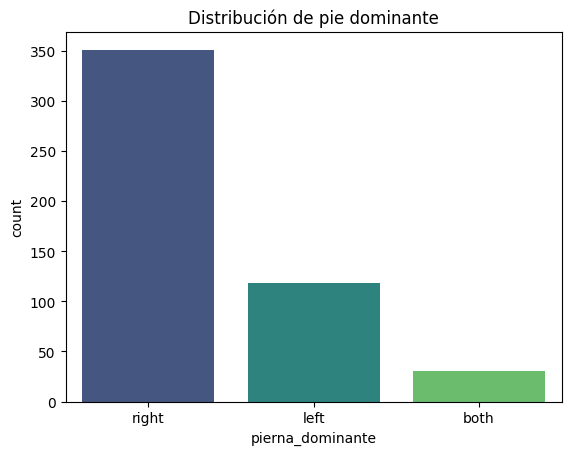

In [882]:
sns.countplot(x = data["pierna_dominante"],palette = "viridis")
plt.title("Distribución de pie dominante")

## Distribucion de patrocinadores en la Bundesliga

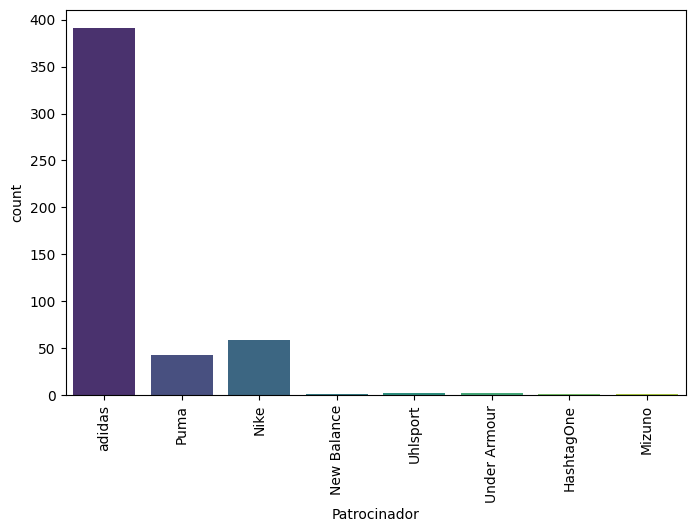

In [883]:
plt.figure(figsize = (8,5))
sns.countplot(x = data["Patrocinador"], palette = "viridis")

plt.xticks(rotation = 90)

plt.show()

## Relacion entre posicion de jugador y su precio

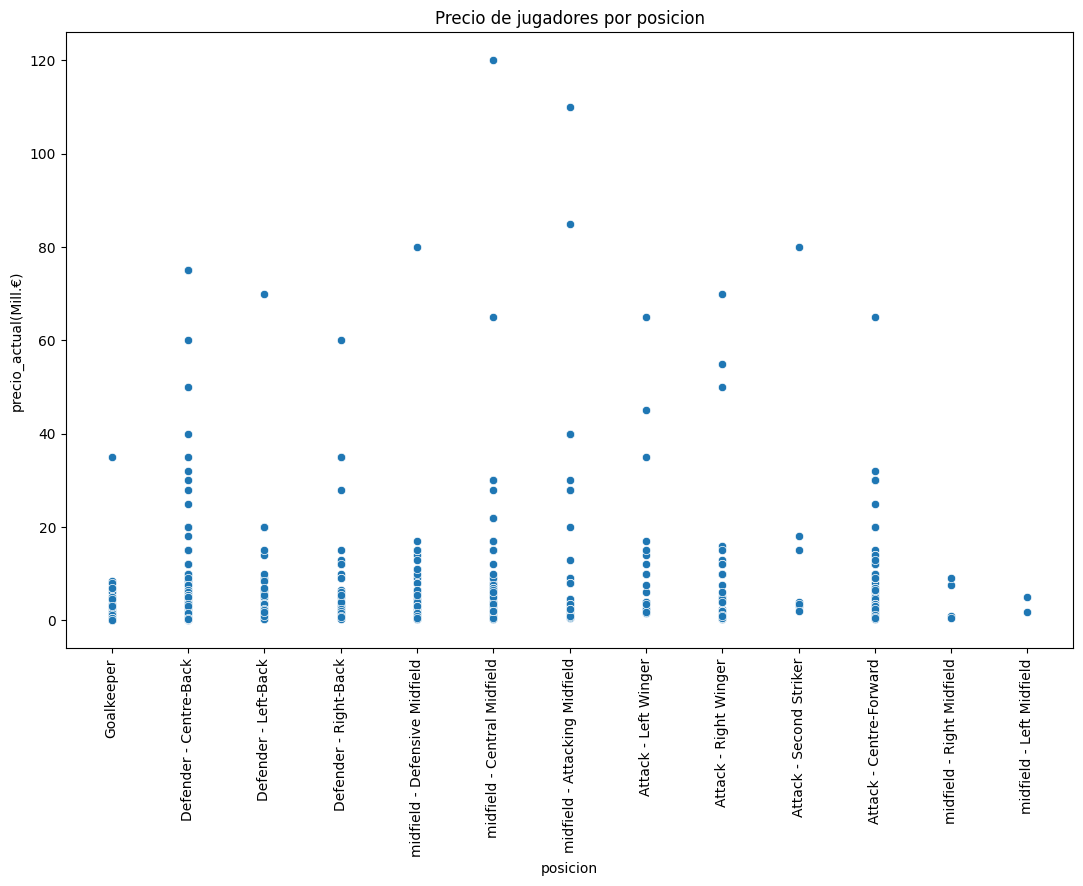

In [884]:
plt.figure(figsize=(13,8))
sns.scatterplot(data = data,x = data["posicion"],y=data["precio_actual(Mill.€)"])

plt.title("Precio de jugadores por posicion")
plt.xticks(rotation = 90)

plt.show()

## Distribucion de posicion de jugador por club

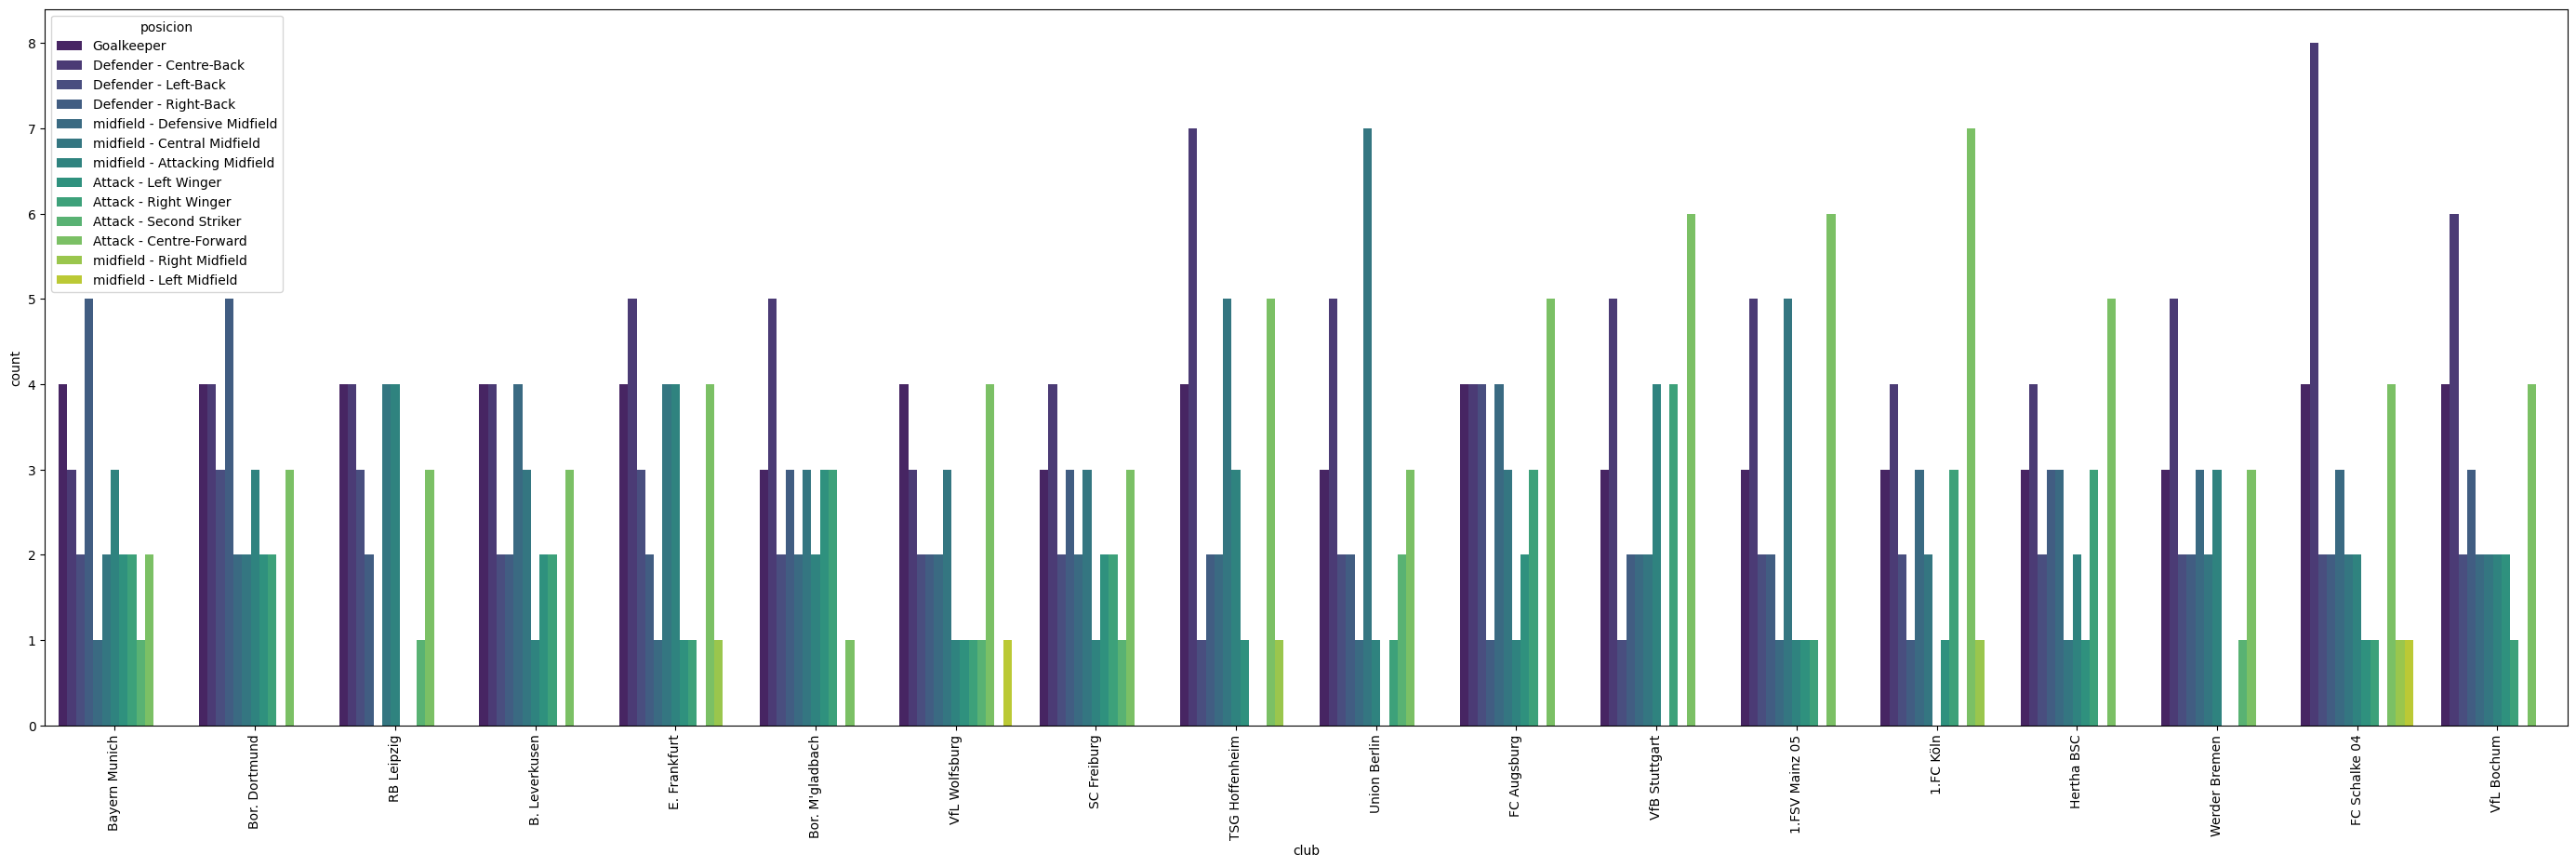

In [885]:
plt.figure(figsize = (35,10))
sns.countplot( x = data["club"], hue = data["posicion"], palette = "viridis")

plt.xticks(rotation = 90)
plt.show()

## Relación entre edad y valor del mercado

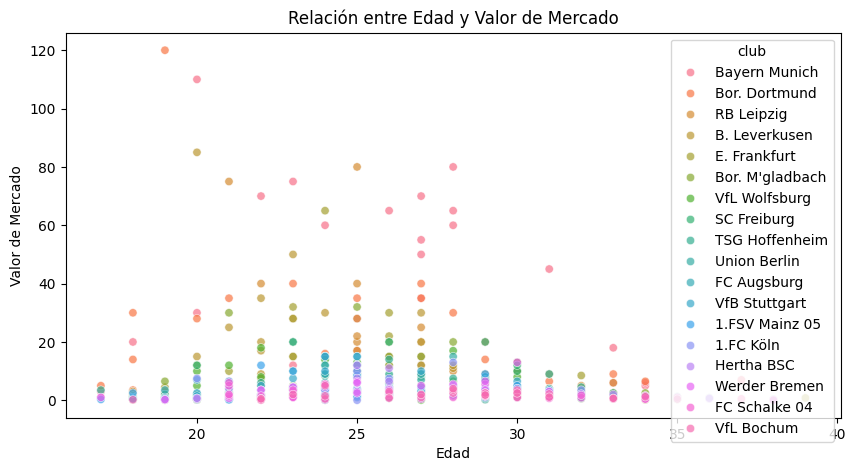

In [886]:
plt.figure(figsize=(10,5))
sns.scatterplot(data = data,x = data["edad"],y = data["precio_actual(Mill.€)"],hue = data["club"], alpha=0.7)
plt.title("Relación entre Edad y Valor de Mercado")
plt.xlabel("Edad")
plt.ylabel("Valor de Mercado")
plt.show()


## Diagrama de bigotes de la data

In [887]:
data.columns

Index(['nombre', 'edad', 'altura(m)', 'nacionalidad', 'lugar_de_nacimiento',
       'precio_actual(Mill.€)', 'maximo_precio(Mill.€)', 'posicion',
       'numero_camiseta', 'pierna_dominante', 'club', 'expiracion_de_contrato',
       'ingreso_al_club', 'agente_del_jugador', 'Patrocinador'],
      dtype='object')

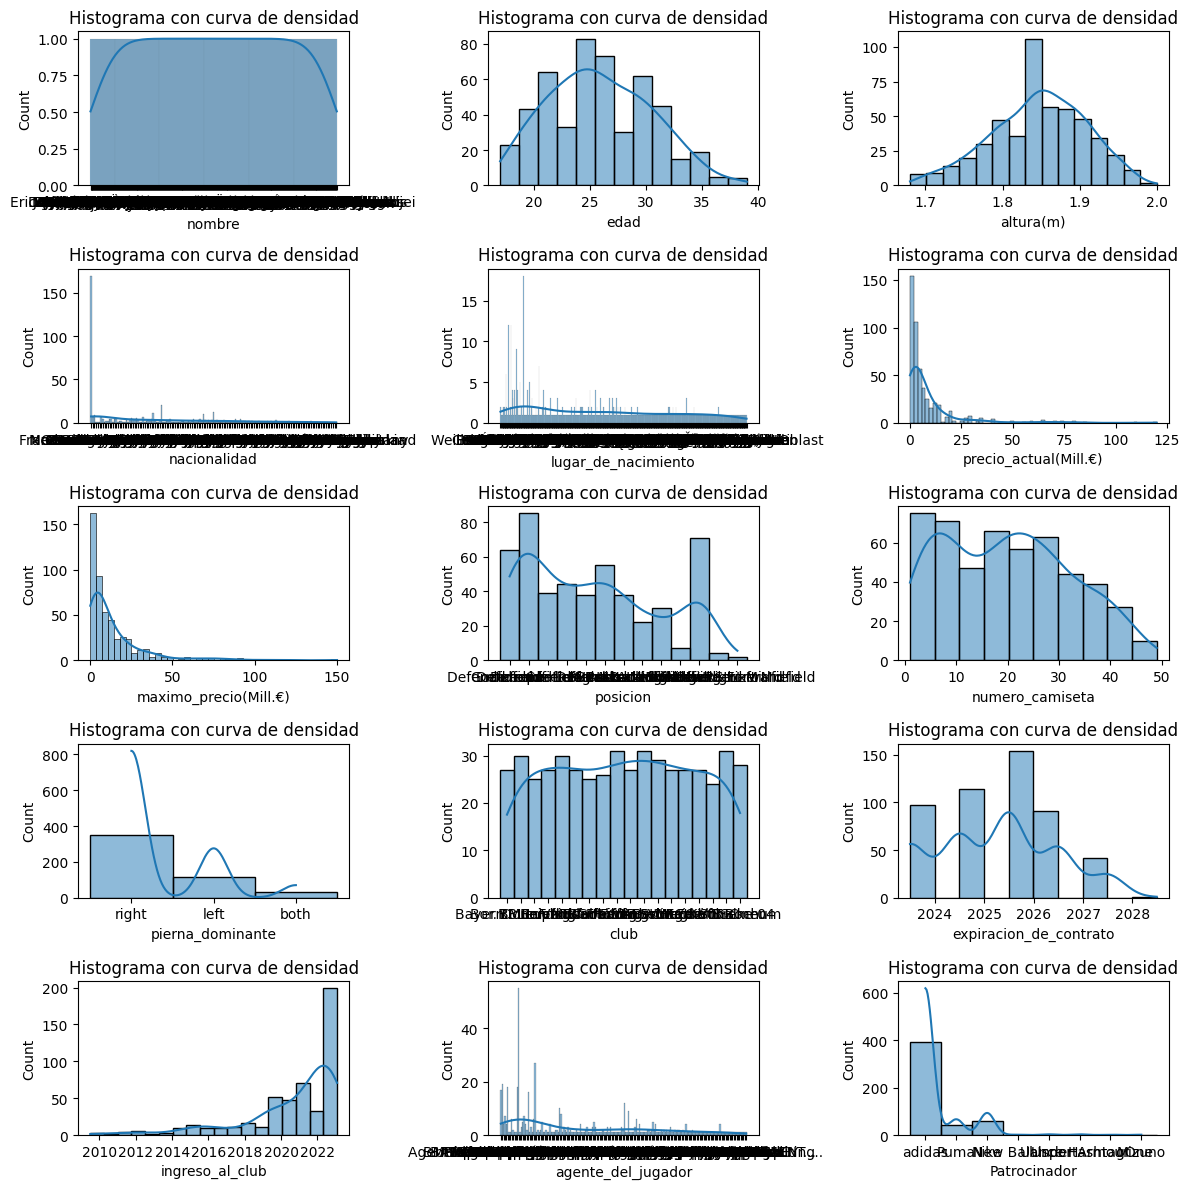

In [888]:
#Creamos grafico de barras con su densidad la cual permite ver la distribución de los datos de nuestro DataFrame

#Asignamos las columnas del dataset a la variable "columnas"
columnas = ['nombre', 'edad', 'altura(m)', 'nacionalidad', 'lugar_de_nacimiento',
       'precio_actual(Mill.€)', 'maximo_precio(Mill.€)', 'posicion',
       'numero_camiseta', 'pierna_dominante', 'club', 'expiracion_de_contrato',
       'ingreso_al_club', 'agente_del_jugador', 'Patrocinador']

fig, axes = plt.subplots(nrows=5,ncols=3,figsize=(12,12))#nrows:# filas - ncols:#colum
axes = axes.flatten()

for i, var in enumerate(columnas): # Iteramos sobre cada columna
 ax = axes[i] # Seleccionamos el eje correspondiente

 sns.histplot(data[var],kde=True,ax=ax) #kde=True; Activamos la curva de densidad
 ax.set_title("Histograma con curva de densidad") # Titulo del grafico
 ax.set_xlabel(var) # Etiquetas del eje x

plt.tight_layout()
plt.show() # Mostramos el grafico

# 4 Información relevante

Teniendo en cuenta el analisis realizado en los apartados anteriores, se determino que solo se consideraran las columna **edad** - **altura(m)** - **nacionalidad** - **precio_actual(Mill.€)** - **maximo_precio(Mill.€)** - **posicion** - **pierna_dominante** - **club** - **Patrocinador**.

In [889]:
data_nueva = data[["edad","altura(m)","nacionalidad","precio_actual(Mill.€)","maximo_precio(Mill.€)",
                   "posicion","pierna_dominante","club","Patrocinador"]]

In [890]:
data_nueva.head()

,edad,altura(m),nacionalidad,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,pierna_dominante,club,Patrocinador
0,37,1.93,Germany,7.0,45.0,Goalkeeper,right,Bayern Munich,adidas
1,34,1.83,Switzerland,5.0,13.0,Goalkeeper,right,Bayern Munich,Puma
2,34,1.92,Germany,0.9,6.0,Goalkeeper,right,Bayern Munich,adidas
3,20,1.91,Germany,0.3,0.3,Goalkeeper,right,Bayern Munich,adidas
4,23,1.89,Netherlands,75.0,75.0,Defender - Centre-Back,right,Bayern Munich,adidas


# 5. Aplicando tecnica one-hot-encoder

Como tenemos varia columnas con valores cualitativos, aplicamos la codificación one-hot-encoder utilizando la funcion **get_dummies** de Pandas.
* Lo que hace esto es crear nuevas columnas en el dataframe, correspondiente a cada valor unico presente en las columnas categoricas.
* Cada una de estas nuevas columnas se llenan con valores entre un rango de (0-1), dependiendo de si el valor original coincide con la categoria correspondiente.

---

**Expecion:** Si la columna es relevante para un modelo de ML,podriamos usar la técnica One Hot Encoder y convirtir sus variables en variable dummies.

---

## Antes de aplicar técnica

Para aplicar la tecnica One-Hot-Encoder tenemos que tener en cuenta:
1. Que las variables categorica no contengan demasiados valores unicos

In [891]:
data_nueva.head(2)

,edad,altura(m),nacionalidad,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,pierna_dominante,club,Patrocinador
0,37,1.93,Germany,7.0,45.0,Goalkeeper,right,Bayern Munich,adidas
1,34,1.83,Switzerland,5.0,13.0,Goalkeeper,right,Bayern Munich,Puma


### Columna : nacionalidad

In [892]:
# Revisando valores unicos de las variables categoricas
data_nueva["nacionalidad"].unique()

array(['Germany', 'Switzerland', 'Netherlands', 'France  Guinea-Bissau',
       'France  Spain', 'Canada  Liberia', 'Portugal', 'France',
       'Morocco  Netherlands', 'Croatia  Germany', 'Senegal  France',
       'Netherlands  Suriname', 'Germany  England', 'Germany  Austria',
       'Germany  Kosovo', 'France  Guadeloupe', 'Senegal',
       'Germany  France', "Germany  Cote d'Ivoire", 'Cameroon  Germany',
       'Germany  Poland', 'France  Mali', 'Portugal  France', 'Norway',
       'Belgium', 'Spain', 'Turkey  Germany', 'Germany  Turkey',
       'England', 'Germany  Syria', 'United States  Portugal',
       'Germany  Nigeria', 'England  Barbados', "Cote d'Ivoire  France",
       'Germany  Cameroon', 'France  Martinique', 'Hungary', 'Croatia',
       'France  Guinea', 'Hungary  Germany', 'Germany  Senegal',
       'Germany  Ghana', 'Austria', 'Mali', 'Slovenia', 'Sweden',
       'United States', 'France  DR Congo', 'Denmark  Tanzania',
       'Finland  Slovakia', 'Russia', 'Burkina 

Utilizando la libreria **pycountry_convert**

Esta libreria sirve para obtener el continente de cada pais de manera automatica sin necesidad de un crear un diccionario y asignarlos manualmente.

In [893]:
#Importamos libreria
#!pip install pycountry-convert
import pycountry_convert as pc

In [894]:
# Función para obtener el continente de un país
def obtener_nacionalidad(pais):
    try:
        # Convertir el país en código de continente
        codigo_pais = pc.country_name_to_country_alpha2(pais)
        codigo_continente = pc.country_alpha2_to_continent_code(codigo_pais)

        # Mapa de continentes
        continentes = {
            "EU": "EUROPA",
            "NA": "AMERICA",
            "SA": "AMERICA",
            "AF": "AFRICA",
            "AS": "ASIA",
            "OC": "OCEANIA"
        }

        return continentes.get(codigo_continente, "MULTICONTINENTAL")

    except:
        return "MULTICONTINENTAL"

In [895]:
# Agregar la nueva columna "continente" en el mismo DataFrame
data_nueva["continente"] = data_nueva["nacionalidad"].apply(obtener_nacionalidad)

In [896]:
data_nueva.head()

,edad,altura(m),nacionalidad,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,pierna_dominante,club,Patrocinador,continente
0,37,1.93,Germany,7.0,45.0,Goalkeeper,right,Bayern Munich,adidas,EUROPA
1,34,1.83,Switzerland,5.0,13.0,Goalkeeper,right,Bayern Munich,Puma,EUROPA
2,34,1.92,Germany,0.9,6.0,Goalkeeper,right,Bayern Munich,adidas,EUROPA
3,20,1.91,Germany,0.3,0.3,Goalkeeper,right,Bayern Munich,adidas,EUROPA
4,23,1.89,Netherlands,75.0,75.0,Defender - Centre-Back,right,Bayern Munich,adidas,EUROPA


In [897]:
data_nueva["continente"].value_counts()

,count
continente,
EUROPA,286
MULTICONTINENTAL,178
ASIA,15
AMERICA,13
AFRICA,7


### Columna : posicion

In [898]:
data_nueva["posicion"].unique()

array(['Goalkeeper', 'Defender - Centre-Back', 'Defender - Left-Back',
       'Defender - Right-Back', 'midfield - Defensive Midfield',
       'midfield - Central Midfield', 'midfield - Attacking Midfield',
       'Attack - Left Winger', 'Attack - Right Winger',
       'Attack - Second Striker', 'Attack - Centre-Forward',
       'midfield - Right Midfield', 'midfield - Left Midfield'],
      dtype=object)

In [899]:
# Creamos diccionario
posicion_jugadores  = {
    "Goalkeeper" : "Arquero",
    #Defensas
    "Defender - Centre-Back": "Defensa",
    "Defender - Left-Back" : "Defensa",
    "Defender - Right-Back" : "Defensa",
    #Mediocampistas
    "midfield - Defensive Midfield":"Mediocampista",
    "midfield - Central Midfield":"Mediocampista",
    "midfield - Attacking Midfield":"Mediocampista",
    "midfield - Right Midfield":"Mediocampista",
    "midfield - Left Midfield":"Mediocampista",
    #Atacante
    "Attack - Left Winger": "Atacante",
    "Attack - Right Winger":"Atacante",
    "Attack - Second Striker": "Atacante",
    "Attack - Centre-Forward":"Atacante"

}

In [900]:
#Creamos nueva columna con mapeo
#Toma la columna "posicion" y reemplaza sus valores segun el diccionario "posicion_jugadores"

data_nueva["posicion_jugadores"] = data_nueva["posicion"].map(posicion_jugadores)

In [901]:
data_nueva.head()

,edad,altura(m),nacionalidad,precio_actual(Mill.€),maximo_precio(Mill.€),posicion,pierna_dominante,club,Patrocinador,continente,posicion_jugadores
0,37,1.93,Germany,7.0,45.0,Goalkeeper,right,Bayern Munich,adidas,EUROPA,Arquero
1,34,1.83,Switzerland,5.0,13.0,Goalkeeper,right,Bayern Munich,Puma,EUROPA,Arquero
2,34,1.92,Germany,0.9,6.0,Goalkeeper,right,Bayern Munich,adidas,EUROPA,Arquero
3,20,1.91,Germany,0.3,0.3,Goalkeeper,right,Bayern Munich,adidas,EUROPA,Arquero
4,23,1.89,Netherlands,75.0,75.0,Defender - Centre-Back,right,Bayern Munich,adidas,EUROPA,Defensa


### Columna : club

In [902]:
data_nueva["club"].unique()

array(['Bayern Munich', 'Bor. Dortmund', 'RB Leipzig', 'B. Leverkusen',
       'E. Frankfurt', "Bor. M'gladbach", 'VfL Wolfsburg', 'SC Freiburg',
       'TSG Hoffenheim', 'Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'Werder Bremen',
       'FC Schalke 04', 'VfL Bochum'], dtype=object)

Como la columna **club** es una variable relevante para hacer modelos de predicción lo tenemos que aplicar la técnica One Hot Encoder

## Aplicando One Hot Encoder

Aplicamos la técnica para las siguientes columnas categoricas:
* club
* Patrocinador
* continente
* posicion_jugadores

In [903]:
data_nueva.columns

Index(['edad', 'altura(m)', 'nacionalidad', 'precio_actual(Mill.€)',
       'maximo_precio(Mill.€)', 'posicion', 'pierna_dominante', 'club',
       'Patrocinador', 'continente', 'posicion_jugadores'],
      dtype='object')

In [904]:
#Eliminamos la columna "nacionalidad" porque "continente" la reemplaza de manera más estructurada y util
#Eliminamos la columna "posicion" porque "posicion_jugadores" la reemplaza de manera más estructurada y util
data_nueva = data_nueva.drop(columns = ["posicion","nacionalidad","Patrocinador"])

In [905]:
data_nueva.head(2)

,edad,altura(m),precio_actual(Mill.€),maximo_precio(Mill.€),pierna_dominante,club,continente,posicion_jugadores
0,37,1.93,7.0,45.0,right,Bayern Munich,EUROPA,Arquero
1,34,1.83,5.0,13.0,right,Bayern Munich,EUROPA,Arquero


Para aplicar la técnica primero hay que transformar las columnas categoricas en valores numericos con **pd.get_dummies**

In [906]:
#Creando lista con variables categoricas
columnas_categoricas = ["pierna_dominante","club","continente","posicion_jugadores"]

In [907]:
# Aplicando One Hot Encoder
data_nueva = pd.get_dummies(data_nueva, columns = columnas_categoricas, prefix = columnas_categoricas)

In [908]:
#Verificando cambios realizados
data_nueva.head()

,edad,altura(m),precio_actual(Mill.€),maximo_precio(Mill.€),pierna_dominante_both,pierna_dominante_left,pierna_dominante_right,club_1.FC Köln,club_1.FSV Mainz 05,club_B. Leverkusen,...,club_Werder Bremen,continente_AFRICA,continente_AMERICA,continente_ASIA,continente_EUROPA,continente_MULTICONTINENTAL,posicion_jugadores_Arquero,posicion_jugadores_Atacante,posicion_jugadores_Defensa,posicion_jugadores_Mediocampista
0,37,1.93,7.0,45.0,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,34,1.83,5.0,13.0,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,34,1.92,0.9,6.0,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,20,1.91,0.3,0.3,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,23,1.89,75.0,75.0,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


# 6. Normalizar o Estandarizar la data

Se aplica **normalización** cuando:

1. La desviación estándar están muy apartadas una de otra.
2. Cuando las variables no son normales (Cuado tienen las curvas muy torcidas en la gráfica), no tienen forma gaussiana.
3. Calculamos la asimetria y curtosis (Opcional)
* Si la asimetria es mayor a 1 se aplica normalizacion
* Si la curtosis es mayor a 3 se aplica normalizacion

Se aplica **Estandarización** cuando:

1. Cuando las variables son normales (Cuando forman la forma de campana Gaussiana)
3. Calculamos la asimetria y curtosis (Opcional)
* Si la asimetria es cercana a 0 se aplica estandarizacion
* Si la curtosis es cerca a 3 se aplica estandarizacion

In [909]:
# Verificando paso 1: Si se cumple
data_nueva.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,499.0,25.885772,4.623688,17.000,22.00,26.00,29.00,39.0
altura(m),499.0,1.847295,0.060941,1.680,1.80,1.85,1.89,2.0
precio_actual(Mill.€),499.0,8.665882,14.761937,0.025,1.50,3.50,9.00,120.0
maximo_precio(Mill.€),499.0,13.807615,18.757603,0.100,2.65,7.00,17.00,150.0


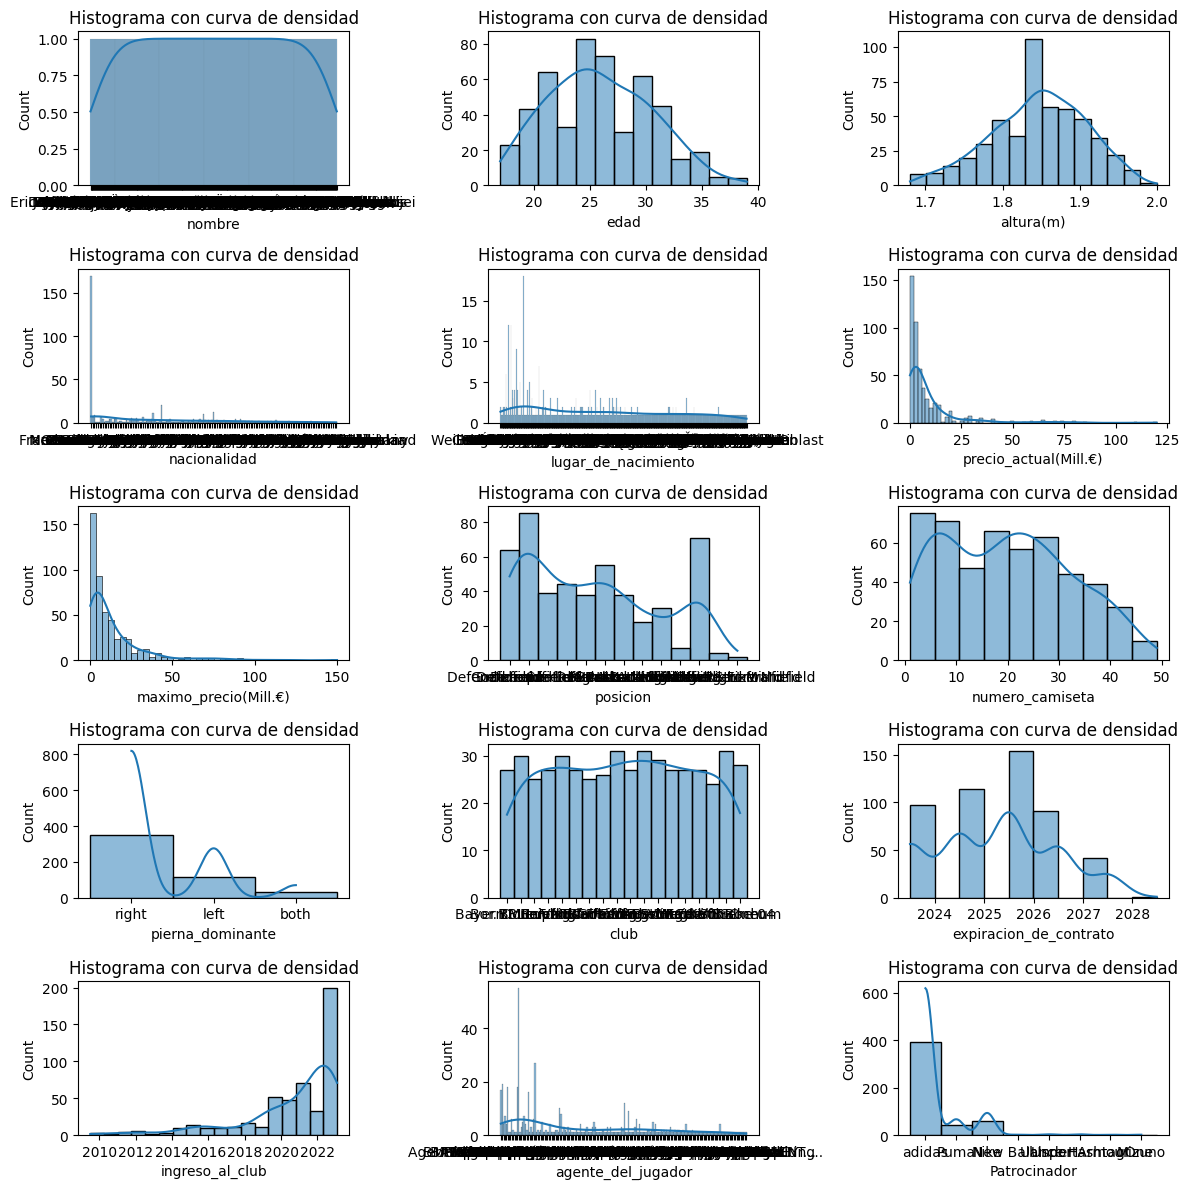

In [910]:
#Verificando paso 2 : Si se cumple

fig, axes = plt.subplots(nrows=5,ncols=3,figsize=(12,12))#nrows:# filas - ncols:#colum
axes = axes.flatten()

for i, var in enumerate(columnas): # Iteramos sobre cada columna
 ax = axes[i] # Seleccionamos el eje correspondiente

 sns.histplot(data[var],kde=True,ax=ax) #kde=True; Activamos la curva de densidad
 ax.set_title("Histograma con curva de densidad") # Titulo del grafico
 ax.set_xlabel(var) # Etiquetas del eje x

plt.tight_layout()
plt.show() # Mostramos el grafico

In [911]:
data_nueva.describe()

,edad,altura(m),precio_actual(Mill.€),maximo_precio(Mill.€)
count,499.000000,499.000000,499.000000,499.000000
mean,25.885772,1.847295,8.665882,13.807615
std,4.623688,0.060941,14.761937,18.757603
min,17.000000,1.680000,0.025000,0.100000
25%,22.000000,1.800000,1.500000,2.650000
50%,26.000000,1.850000,3.500000,7.000000
75%,29.000000,1.890000,9.000000,17.000000
max,39.000000,2.000000,120.000000,150.000000


In [912]:
# Verificando paso 3 :
#Solo para variables numericas
columnas_numericas = ["edad", "altura(m)", "precio_actual(Mill.€)", "maximo_precio(Mill.€)"]

In [913]:
# Mirando Asimetria de la data
print(data_nueva[columnas_numericas].skew())   # Asimetría

edad                     0.244105
altura(m)               -0.269339
precio_actual(Mill.€)    3.769670
maximo_precio(Mill.€)    2.958788
dtype: float64


In [914]:
#Mirando curtosis de la data
print(data_nueva[columnas_numericas].kurtosis())  # Curtosis

edad                     -0.544093
altura(m)                -0.330877
precio_actual(Mill.€)    17.455354
maximo_precio(Mill.€)    11.652291
dtype: float64


## 6.1 Normalizando la data

Para normalizar la data se utilizó el método de MinMaxScaler normalizando solo la variable X porque es donde están los datos numéricos del dataset, no se uso **y** porque es donde esta almacenada nuestra variable categórica.

In [915]:
# Importamos librerias MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [916]:
import numpy as np
# Definir las columnas a normalizar (porque tienen distribución sesgada)
columnas_normalizar = ["edad","altura(m)","precio_actual(Mill.€)", "maximo_precio(Mill.€)"]


def datanormalizados(df):
    valores = df.values  # Extraer solo los valores sin encabezado
    scaler = MinMaxScaler(feature_range=(0, 1))  # Normalización entre 0 y 1

    # Ajustar el scaler a los datos
    scaler.fit(valores)

    # Mostrar los valores mínimos y máximos encontrados
    print(pd.DataFrame(np.vstack((scaler.data_min_, scaler.data_max_)),
                       index=["Min", "Max"],
                       columns=df.columns))

    # Aplicar la normalización
    normalizados = scaler.transform(valores)

    # Crear un nuevo DataFrame con los valores normalizados
    df_norm = pd.DataFrame(normalizados, index=df.index, columns=df.columns)

    return df_norm

In [917]:
# Aplicamos la función a las columnas que queremos normalizar
datanormalizada = datanormalizados(data[columnas_normalizar])

     edad  altura(m)  precio_actual(Mill.€)  maximo_precio(Mill.€)
Min  17.0       1.68                  0.025                    0.1
Max  39.0       2.00                120.000                  150.0


In [918]:
#Mostrando valores estadisticos de la data normalizada
datanormalizada.describe().T

,count,mean,std,min,25%,50%,75%,max
edad,499.0,0.403899,0.210168,0.0,0.227273,0.409091,0.545455,1.0
altura(m),499.0,0.522796,0.190439,0.0,0.375000,0.531250,0.656250,1.0
precio_actual(Mill.€),499.0,0.072022,0.123042,0.0,0.012294,0.028964,0.074807,1.0
maximo_precio(Mill.€),499.0,0.091445,0.125134,0.0,0.017011,0.046031,0.112742,1.0


In [919]:
data_nueva.head()

,edad,altura(m),precio_actual(Mill.€),maximo_precio(Mill.€),pierna_dominante_both,pierna_dominante_left,pierna_dominante_right,club_1.FC Köln,club_1.FSV Mainz 05,club_B. Leverkusen,...,club_Werder Bremen,continente_AFRICA,continente_AMERICA,continente_ASIA,continente_EUROPA,continente_MULTICONTINENTAL,posicion_jugadores_Arquero,posicion_jugadores_Atacante,posicion_jugadores_Defensa,posicion_jugadores_Mediocampista
0,37,1.93,7.0,45.0,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,34,1.83,5.0,13.0,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
2,34,1.92,0.9,6.0,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,20,1.91,0.3,0.3,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,23,1.89,75.0,75.0,False,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


# 7. Test de normalidad de shapirowilk

Se hace test de normalidad la cual permite definir que variable es más optima para poder predecir el modelo.

In [920]:
#Importamos la libreria
from scipy import stats

def testshapirowilk(df):
  valoresp=[]
  concepto=[]
  variable=[]

  for column in df:
    k2,p_value = stats.shapiro(df[column].values)
    valoresp.append(p_value)
    variable.append(column)

    if(p_value < 0.05):
      concepto.append("No es una variable normal")
    else:
      concepto.append("Es una variable normal")

  dfshapiro = pd.DataFrame({"Variable":variable,"Valores P":valoresp,"Concepto":concepto})
  return dfshapiro

#Muestra resultado
testshapirowilk(data_nueva)

,Variable,Valores P,Concepto
0,edad,1.341234e-05,No es una variable normal
1,altura(m),4.443739e-04,No es una variable normal
2,precio_actual(Mill.€),1.047946e-33,No es una variable normal
3,maximo_precio(Mill.€),8.576254e-30,No es una variable normal
4,pierna_dominante_both,1.445206e-40,No es una variable normal
5,pierna_dominante_left,1.898915e-34,No es una variable normal
6,pierna_dominante_right,3.970142e-33,No es una variable normal
7,club_1.FC Köln,7.229423e-41,No es una variable normal
8,club_1.FSV Mainz 05,7.229423e-41,No es una variable normal
9,club_B. Leverkusen,7.229423e-41,No es una variable normal


Se evidencia que ninguna variable es una variable normal, lo que significa que es muy dificil con este dataset hacer un tema de predicciones.

Al no tener ninguna variable apta para predecir se soluciona haciendo una correlación para saber que tan relacionadas esta una variable de la otra.

# 8. Correlación

Muestra que tan relacionadas estan las varaibles.
* La correlacion se da entre valores de -1 y 1, siendo 1 la mejor y -1 regular.

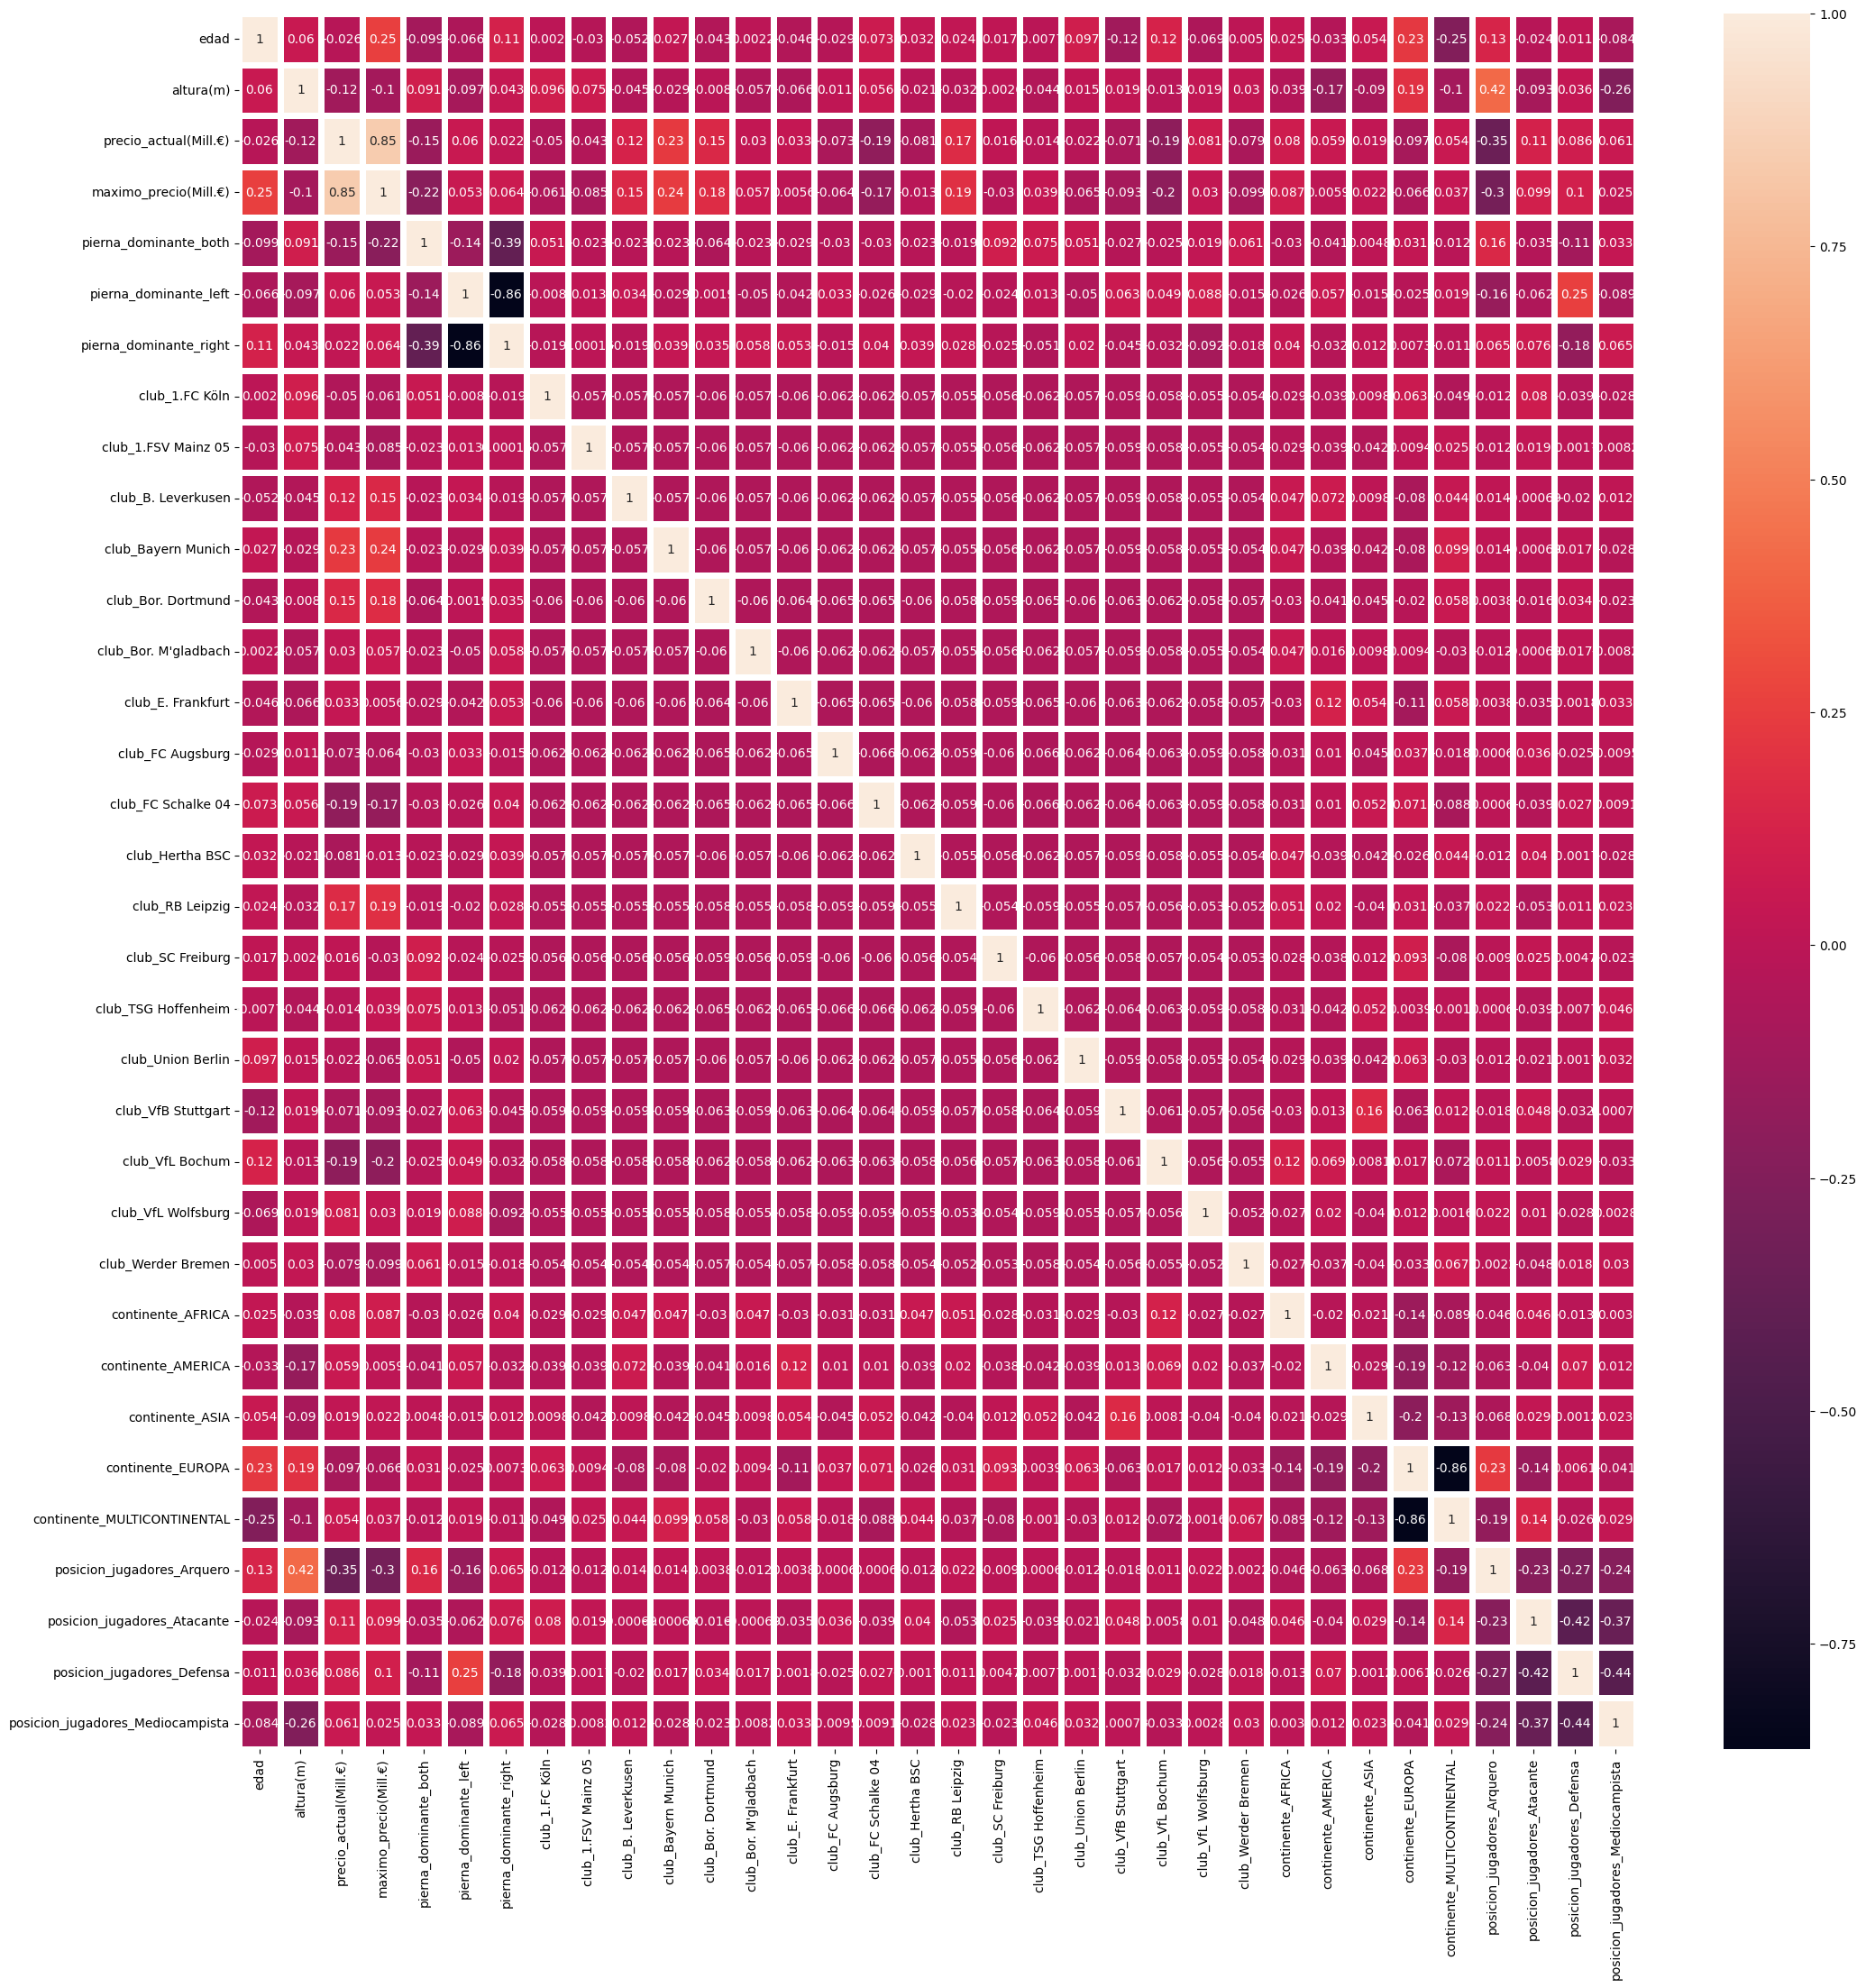

In [921]:
#Aplicando correlacion con metodo spearman
# La correlación se deja con el metodo spearman porque genera correlaciones altas

def diagrama (df,tamuno,tamdos):
  f, ax = plt.subplots(figsize=(tamuno,tamdos))
  sns.heatmap(df.corr(method="spearman"),annot=True, linewidths=5, ax=ax)

diagrama(data_nueva,25,25)

Notamos que las columnas **maximo_precio** y **precio_actual** tienen buena correlación de un 85%

Solo pocas variables tienen una buena correlación, al ser tan pocas se puede optar por hacer un árbol de desición para resolver temas de predicción.

## 8.1 Exportando data limpia y normalizada

In [922]:
data_nueva.to_csv("DataNormalizadaBundesliga.csv", index = False)

# 9. Aplicando modelos ML para predecir

Para hacer nuestra predicción nos vamos a basar en las columnas que tienen una alta correlación como es el caso de **maximo_precio** y **precio_actual**

## Modelo 1: Aplicando arbol de desicion - Sin hiperparametros

Como queremos predecir una variable numerica se utilizara un **Arbol de desicion Regresor**

In [923]:
#Importamos biblioteca de entrenamiento y testeo
from sklearn.model_selection import train_test_split

# Importamos modelo de arbol de desicion regresor
from sklearn.tree import DecisionTreeRegressor

#Importamos metricas
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.metrics import classification_report

In [924]:
datanueva_normalizada = pd.read_csv("/content/DataNormalizadaBundesliga.csv")

In [925]:
# Definimos la variable objetivo "y" (precio_actual) y las características (X)
X = datanueva_normalizada.drop(columns=["precio_actual(Mill.€)"])  # Eliminamos la variable objetivo de las características
y = datanueva_normalizada["precio_actual(Mill.€)"]  # Variable objetivo


# Dividimos los datos en conjunto de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [926]:
# Creando modelo y entrenando
modelo = DecisionTreeRegressor(criterion="squared_error", max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

# Reliza predicciones
y_pred = modelo.predict(X_test)

In [933]:
# Evalua el rendimiento del modelo
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Imprimir resultados
print("-"*50)
print("Evaluación del Modelo de Árbol de Decisión - Regresión")
print("-"*50)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

--------------------------------------------------
Evaluación del Modelo de Árbol de Decisión - Regresión
--------------------------------------------------
Error Cuadrático Medio (MSE): 94.0740
Error Absoluto Medio (MAE): 4.2780
Coeficiente de Determinación (R²): 0.7630


## Modelo 2 : Aplicando hiperparametros

Los hiperparametros nos ayudan a encontrar cuales son

In [928]:
#"solver":["saga","newton-cg","sag","lbfgs"]
#"penalty": ["l1","l2","elasticnet",None]

# Implementando hiperparámetros
param_grid = {
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["squared_error", "friedman_mse", "absolute_error"]
}

#Importamos libreria que saca las mejores parámetros
from sklearn.model_selection import GridSearchCV

# Creando modelo y entrenando
grid_search = GridSearchCV(modelo, param_grid, cv = 10, scoring = "accuracy",verbose = 1)
grid_search.fit(X_train,y_train)


Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(max_depth=5, random_state=42),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [929]:
# Obtener el mejor modelo encontrado
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo sobre el conjunto de prueba
y_pred_best = best_model.predict(X_test)

In [932]:
# Evaluar el rendimiento del mejor modelo
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

print("-"*50)
print("Evaluación del Mejor Modelo - Árbol de Decisión")
print("-"*50)
print(f"Mejores Hiperparámetros: {grid_search.best_params_}")
print(f"Error Cuadrático Medio (MSE): {mse_best:.4f}")
print(f"Coeficiente de Determinación (R²): {r2_best:.4f}")
print(f"Error Absoluto Medio (MAE): {mae_best:.4f}")

--------------------------------------------------
Evaluación del Mejor Modelo - Árbol de Decisión
--------------------------------------------------
Mejores Hiperparámetros: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Error Cuadrático Medio (MSE): 109.6107
Coeficiente de Determinación (R²): 0.7239
Error Absoluto Medio (MAE): 5.2160


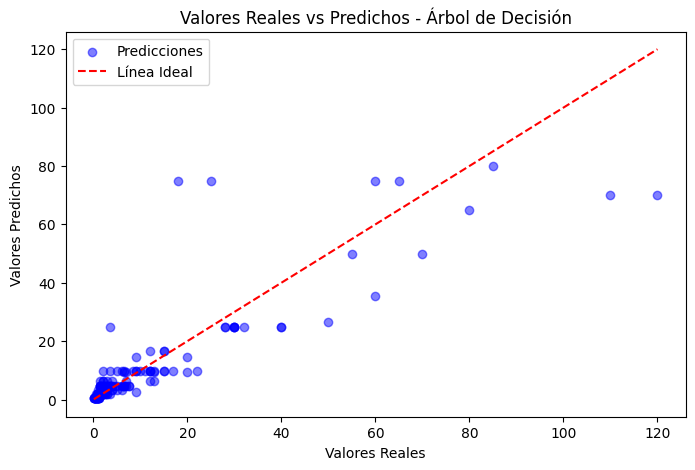

In [931]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue", label="Predicciones")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--", label="Línea Ideal")
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs Predichos - Árbol de Decisión")
plt.legend()
plt.show()


Conclusiones

* La mayoría de los puntos están cerca de la línea roja (y = x), lo que indica que el modelo hace predicciones relativamente buenas.
* Sin embargo, hay cierta dispersión, lo que significa que el modelo no predice con exactitud perfecta.

# 10.Evaluación general de los modelos de arbol de desicion

Hemos construido dos versiones del modelo de regresión con Árbol de Decisión:
1. Modelo sin Hiperparámetros (configuración por defecto).
2. Modelo con Hiperparámetros Optimizados (usando GridSearchCV para mejorar el rendimiento).



## 10.1 Comparando métricas

Métrica                    | Modelo 1                  |   Modelo 2                |
---------------------------|---------------------------|---------------------------|
----------------------------|Modelo Sin hiperparametros| Modelo con Hiperparametros|
MSE (Error Cuadrático Medio)|94.07                     | 109.6107
R² (Coeficiente de Determinación) |  0.7630            |0.7239
Error Absoluto Medio (MAE)        | 4.2780             | 5.2160

* **MSE (Error Cuadrático Medio):** El modelo sin hiperparametros tiene menor MSE, lo que nos indica que sus predicciones tienen menos error promedio.
* **R2 (Coeficiente de Determinación):**El modelo 1 tiene un R2: 0.76, al estar más cercano al 1, significa que el modelo puede predecir con presición un 76%.
* **MAE (Error Absoluto Medio):** El modelo 1 tiene un menor MAE,lo que indica que en promedio, sus predicciones estan mas cerca del valor real.

**En conclución:** el modelo 1 es superior porque tienen un menor error de predicción, mayor capacidad explicativa(mayor poder descriptivo) y tiene mayor estabilidad funciona mejor con datos nuevos en el futuro.